In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Simple Linear Regression
A straight-line fit is a model of the form *y = ax + b* where *a* is commonly known as the slope, and *b* is the intercept.

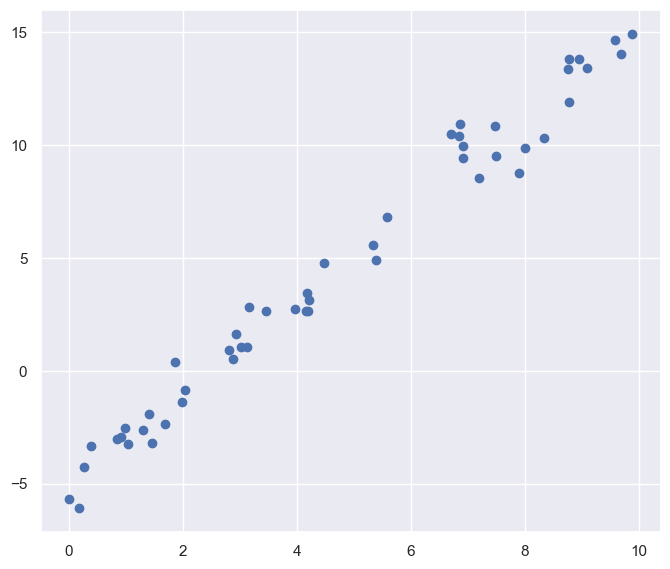

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

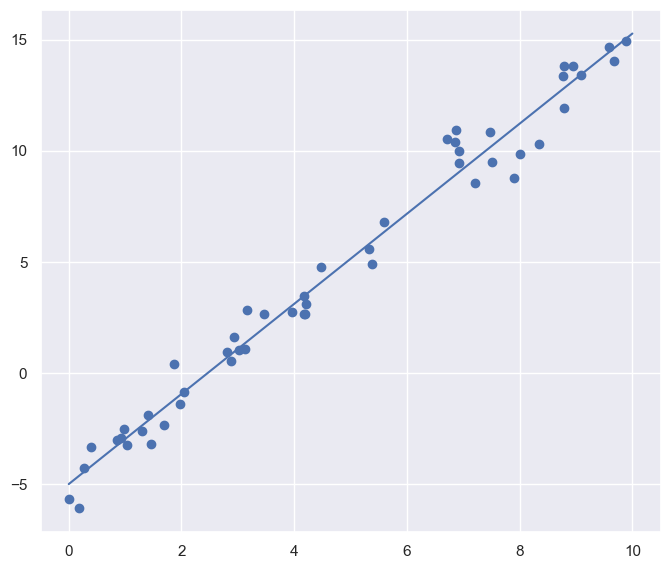

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) ## init
model.fit(x[:, np.newaxis], y) ## fit
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis]) ## predict

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [4]:
model.coef_

array([2.02720881])

In [5]:
model.intercept_

-4.998577085553202

In [6]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000127
[ 1.5 -2.   1. ]


# Advertising Data
Explore

In [7]:
import pandas as pd
adv = pd.read_csv('../_input/islr/Advertising.csv', usecols=(1,2,3,4))

In [8]:
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


We predict Sales by using the spending for TV, Radio and Newspaper.

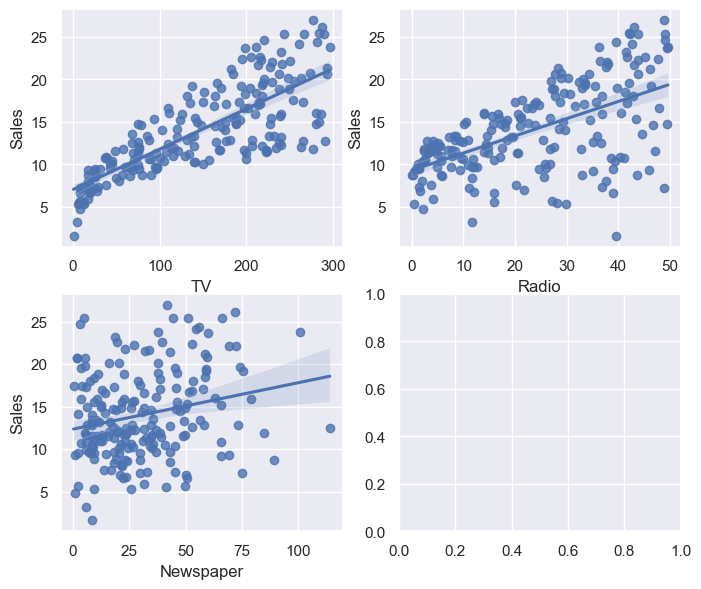

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2)

sns.regplot(x='TV',y='Sales', data=adv, ax=ax[0,0])
sns.regplot(x='Radio',y='Sales', data=adv, ax=ax[0,1])
sns.regplot(x='Newspaper',y='Sales', data=adv, ax=ax[1,0]);

We use sklearn to get the slope and intercept of the data between TV and Sales.

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np
lm = LinearRegression() # init
xfit = lm.fit(adv['TV'].values[:, np.newaxis], adv['Sales'].values) # fit

In [11]:
xfit.coef_

array([0.04753664])

In [12]:
xfit.intercept_

7.032593549127693

Graph the line into the dataset to see how it fits.

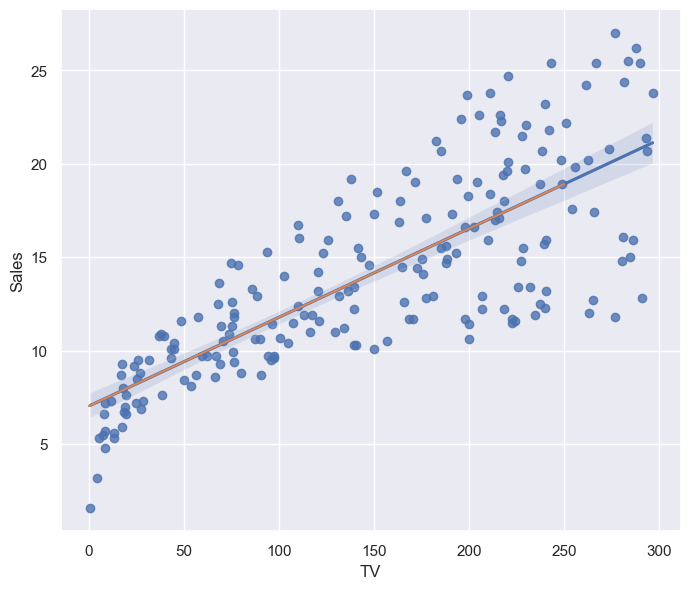

In [13]:
sns.regplot(x='TV', y='Sales', data=adv)
plt.plot([0, 250],[xfit.predict([[0]]), xfit.predict([[250]])]);

If X is at zero, then the value of y would below and this is the intercept.

In [14]:
xfit.predict([[0]])

array([7.03259355])

If X is 5 and 250, then we get the corresponding values for Y. Add a line between these points and you get the regression line.

But how are these coefficients being calculated?

In [15]:
[xfit.predict([[5]]), xfit.predict([[250]])]

[array([7.27027675]), array([18.91675366])]

# Estimating the Coefficients
I want to calculate the intercept and slope manually so that I can understand the concept of it.

In [16]:
x = adv['TV']
y = adv['Sales']

There are two components to the slope. First is the sum distance of each point of x away from its means multiplied by distance of y from its mean. The denominator is the squared distance of x from its mean. This formula is calculates the slope where RSS minimized as small as possible.

In [28]:
## Breaking down the slope
distance_coefficient = sum((x - x.mean()) * (y - y.mean()))
spread_x = sum((x - x.mean())**2)
slope =  distance_coefficient / spread_x
slope

0.04753664043301969

In [35]:
# b0 is the intercept
intercept = y.mean() - slope * x.mean()
intercept

7.032593549127705

The intercept is the starting point of the regression line. Remember that the regression line is the average of x and y. We get it by subtracting the product of slope and the x.mean by y mean.

In [36]:
yhat = intercept + slope * adv['TV']
yhat

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Name: TV, Length: 200, dtype: float64

Now that we know the intercept and slope, we can use the points of x to estimate the value of y by adding intercept and multiplying slope with all the points of x.

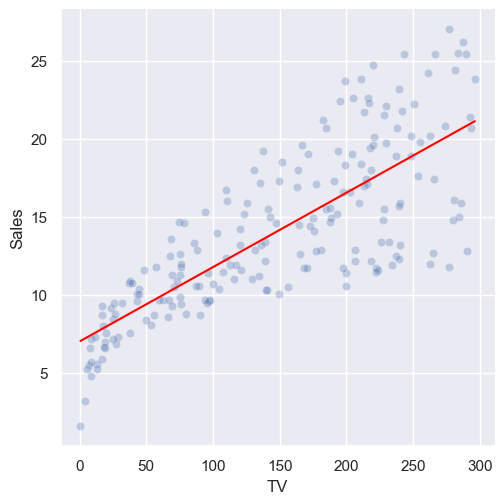

In [56]:
sns.relplot(x=x, y=y, alpha=.3)
sns.lineplot(x=x, y=yhat, color='red');

We get the regression line - the line that has the minimum distance from all the points in our data.

# Assessing the Linear Model

In [57]:
rss = sum((y - yhat)**2)
rss

2102.5305831313517

In [114]:
n = len(adv)
rse = np.sqrt((rss/(n-2)))
rse

3.258656368650463

In [115]:
yhat.name = 'taget'

In [116]:
se_slope = np.sqrt(rse**2 / sum( (x - x.mean())**2 ) )
se_slope

0.00269060718779687

In [117]:
se_intercept = np.sqrt(
    rse**2 * ( 1/n + (x.mean()**2 / sum((x - x.mean())**2))  ) )
se_intercept

0.45784294027347844

In [122]:
yhat_se_up = (intercept+(2*se_intercept)) + (slope + (2*se_slope)) * adv['TV']

yhat_se_down = (intercept-(2*se_intercept)) + (slope - (2*se_slope)) * adv['TV']


In [123]:
yhat_se_up

0      20.124678
1      10.303124
2       8.858467
3      15.965334
4      17.515828
         ...    
195     9.969741
196    12.933141
197    17.314740
198    22.955783
199    20.230514
Name: TV, Length: 200, dtype: float64

<AxesSubplot:xlabel='TV', ylabel='Sales'>

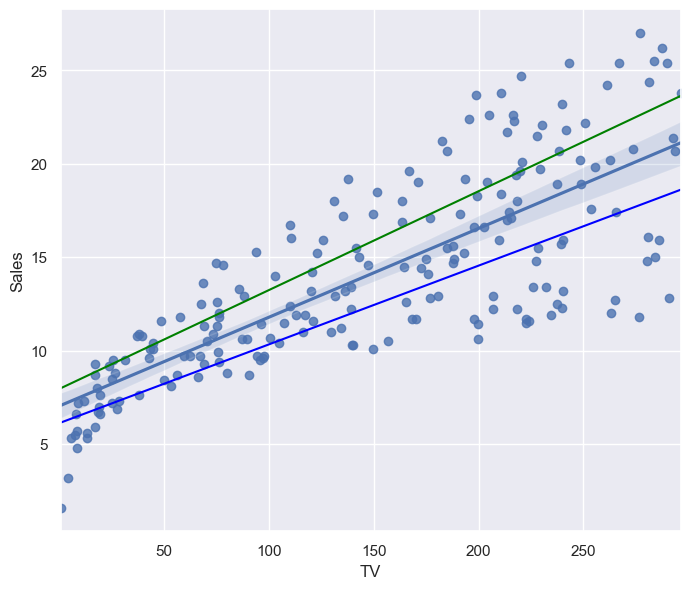

In [124]:
# sns.relplot(x=x, y=y, alpha=.3)
# sns.lineplot(x=x, y=yhat, color='red');
sns.lineplot(x=x, y=yhat_se_up, color='green');
sns.lineplot(x=x, y=yhat_se_down, color='blue');
sns.regplot(x='TV', y='Sales', data=adv)


## t-statistic
From the standard Error, we calculate the t-statistic which is the exact point from the standard deviation.

In [40]:
(intercept - 0) / se_intercept

15.360275174117573

In [39]:
(slope - 0) / se_slope

17.667625600875528